<a href="https://colab.research.google.com/github/karki-dennis/Global-Terrorism-Datas-Visualization/blob/vda-coursework/code/VDA_CourseWork_Rough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Overview:**
This dataset, sourced from the National Consortium for the Study of Terrorism and Responses to Terrorism (START) at the University of Maryland, offers a comprehensive view of global terrorist incidents from 1970 to 2017. It includes data on both domestic and international terrorism, providing detailed information on various aspects of these incidents.

**Key Attributes:**

eventid: Unique identifier for each event.

iyear: Year of the incident.

imonth: Month of the incident.

iday: Day of the incident.

approxdate: Approximate date of the incident, when exact date is unknown.

country: Country where the incident occurred.

region: Region classification of the incident location.

attacktype: Type of attack (e.g., bombing, armed assault).

targettype: Type of target (e.g., government, private citizens).

weapontype: Type of weapon used in the incident.

nkill: Number of people killed in the incident.

nwound: Number of people wounded in the incident.

gname: Name of the group or individual responsible for the attack.

motive: Known motive behind the attack, if available.

The dataset contains a wealth of information that can be used to analyze trends in terrorism over time, the geographical distribution of incidents, the tactics and targets of terrorist groups, and the impact of these events on global security.

**Rationale for Dataset Selection:**
The dataset was chosen for its extensive coverage of terrorist incidents over nearly five decades. Its detailed records provide a valuable resource for analyzing the evolution of terrorism, identifying patterns, and understanding the underlying factors driving these incidents. This analysis can aid policymakers, researchers, and security agencies in developing strategies to counter terrorism and mitigate its impact on society.

In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=37aca3fea9cc071de7eacc3e7ed451695363e9717798f01e94e90e5c67d7af87
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=92b46a71bc6c2cd6faaedea4932e48b1cfa6cbb5a1e4545dc81441a1695ec0a8
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession

# Initialize a Spark session
spark = SparkSession.builder.appName("BigDataAnalysis").getOrCreate()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
spark_df = spark.read.csv('/content/drive/MyDrive/VDA DATA/globaltsmdata.csv', header=True, inferSchema=True)


In [ ]:
# Show the first few rows
spark_df.show(5)

# Display schema
spark_df.printSchema()


+------------+-----+------+----+----------+--------+----------+-------+------------------+------+--------------------+---------+-------------+---------+----------+-----------+--------+--------+-------+-----+-----+-----+---------+-----------+---------------+--------+-------+-------+-----------+--------------------+-----------+---------------+-----------+---------------+---------+--------------------+------------+--------------------+--------------------+--------------------+-------+------------------+---------+-------------+------------+----------------+-----+-------+-------+-----------+---------+-------------+------------+----------------+-----+-------+-------+-----------+--------------------+--------+------+---------+------+---------+------+-----------+-----------+-----------+----------+------+--------+-------+---------+-------------+------+----------+--------------+------+----------+--------------+---------+---------+-------------+------------+--------------------+---------+---------

In [ ]:
# prompt: Count row of dataset using spark

# Count the number of rows
row_count = spark_df.count()
print("Number of rows in the dataset:", row_count)


Number of rows in the dataset: 181691


In [ ]:

# Count the number of events by country
spark_df.groupBy("country_txt").count().orderBy("count", ascending=False).show()

+--------------+-----+
|   country_txt|count|
+--------------+-----+
|          Iraq|24636|
|      Pakistan|14368|
|   Afghanistan|12731|
|         India|11960|
|      Colombia| 8306|
|   Philippines| 6908|
|          Peru| 6096|
|   El Salvador| 5320|
|United Kingdom| 5235|
|        Turkey| 4292|
|       Somalia| 4142|
|       Nigeria| 3907|
|      Thailand| 3849|
|         Yemen| 3347|
|         Spain| 3249|
|     Sri Lanka| 3022|
| United States| 2836|
|       Algeria| 2743|
|        France| 2693|
|         Egypt| 2479|
+--------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col, isnan, when, count

missing_data = spark_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in spark_df.columns])
missing_data.show()


+-------+-----+------+----+----------+--------+----------+-------+-----------+------+----------+---------+----+--------+---------+-----------+--------+--------+-------+-----+-----+-----+---------+-----------+---------------+--------+-------+-------+-----------+---------------+-----------+---------------+-----------+---------------+---------+-------------+------------+----------------+-----+-------+-------+-----------+---------+-------------+------------+----------------+------+-------+-------+-----------+---------+-------------+------------+----------------+------+-------+-------+-----------+-----+--------+------+---------+------+---------+------+-----------+-----------+-----------+----------+------+--------+-------+---------+-------------+------+----------+--------------+------+----------+--------------+---------+---------+-------------+------------+----------------+---------+-------------+------------+----------------+---------+-------------+------------+----------------+---------+--

In [ ]:
spark_df.groupBy("country_txt").count().orderBy("count", ascending=False).show()

+--------------+-----+
|   country_txt|count|
+--------------+-----+
|          Iraq|24636|
|      Pakistan|14368|
|   Afghanistan|12731|
|         India|11960|
|      Colombia| 8306|
|   Philippines| 6908|
|          Peru| 6096|
|   El Salvador| 5320|
|United Kingdom| 5235|
|        Turkey| 4292|
|       Somalia| 4142|
|       Nigeria| 3907|
|      Thailand| 3849|
|         Yemen| 3347|
|         Spain| 3249|
|     Sri Lanka| 3022|
| United States| 2836|
|       Algeria| 2743|
|        France| 2693|
|         Egypt| 2479|
+--------------+-----+
only showing top 20 rows



In [ ]:
spark_df.groupBy("iyear").count().orderBy("iyear").show()


+-----+-----+
|iyear|count|
+-----+-----+
| 1970|  651|
| 1971|  471|
| 1972|  568|
| 1973|  473|
| 1974|  581|
| 1975|  740|
| 1976|  923|
| 1977| 1319|
| 1978| 1526|
| 1979| 2662|
| 1980| 2662|
| 1981| 2586|
| 1982| 2544|
| 1983| 2870|
| 1984| 3495|
| 1985| 2915|
| 1986| 2860|
| 1987| 3183|
| 1988| 3721|
| 1989| 4324|
+-----+-----+
only showing top 20 rows



In [ ]:
spark_df.groupBy("region_txt").count().orderBy("count", ascending=False).show(10)


+--------------------+-----+
|          region_txt|count|
+--------------------+-----+
|Middle East & Nor...|50474|
|          South Asia|44974|
|       South America|18978|
|  Sub-Saharan Africa|17550|
|      Western Europe|16639|
|      Southeast Asia|12485|
|Central America &...|10344|
|      Eastern Europe| 5144|
|       North America| 3456|
|           East Asia|  802|
+--------------------+-----+
only showing top 10 rows



In [ ]:
spark_df.groupBy("attacktype1_txt").count().orderBy("count", ascending=False).show()


+--------------------+-----+
|     attacktype1_txt|count|
+--------------------+-----+
|   Bombing/Explosion|88101|
|       Armed Assault|42566|
|       Assassination|19285|
|Hostage Taking (K...|11115|
|Facility/Infrastr...|10222|
|             Unknown| 7267|
|     Unarmed Assault| 1003|
|Hostage Taking (B...|  989|
|           Hijacking|  657|
|                   0|  167|
|                   1|  100|
|                   3|   56|
|                   7|   52|
|                   2|   40|
|                NULL|   35|
|                   6|   16|
|                   8|    5|
|                   9|    4|
|                   5|    2|
| the Red Hand Def...|    1|
+--------------------+-----+
only showing top 20 rows



In [ ]:
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType

# Cast the columns to DoubleType
spark_df = spark_df.withColumn("nkill", col("nkill").cast(DoubleType()))
spark_df = spark_df.withColumn("nwound", col("nwound").cast(DoubleType()))

# Check if the casting was successful by printing the schema
spark_df.printSchema()


root
 |-- eventid: long (nullable = true)
 |-- iyear: integer (nullable = true)
 |-- imonth: integer (nullable = true)
 |-- iday: integer (nullable = true)
 |-- approxdate: string (nullable = true)
 |-- extended: integer (nullable = true)
 |-- resolution: string (nullable = true)
 |-- country: integer (nullable = true)
 |-- country_txt: string (nullable = true)
 |-- region: integer (nullable = true)
 |-- region_txt: string (nullable = true)
 |-- provstate: string (nullable = true)
 |-- city: string (nullable = true)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- specificity: integer (nullable = true)
 |-- vicinity: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- summary: string (nullable = true)
 |-- crit1: string (nullable = true)
 |-- crit2: string (nullable = true)
 |-- crit3: string (nullable = true)
 |-- doubtterr: string (nullable = true)
 |-- alternative: string (nullable = true)
 |-- alternative_txt: string (nullable

In [ ]:
correlation = spark_df.corr("nkill", "nwound")
print(f"Correlation between number of kills and number of wounds: {correlation}")


Correlation between number of kills and number of wounds: 0.4437453082033473


In [ ]:
pivot_table = spark_df.groupBy("iyear", "country_txt").count().groupBy("iyear").pivot("country_txt").sum("count")
pivot_table.show()

+-----+-----------+-------+-------+-------+------+-------------------+---------+-------+---------+-------+----------+-------+-------+----------+--------+-------+-------+------+-----+------+-------+------------------+--------+------+------+--------+------------+-------+--------+--------+------+------------------------+----+-----+-----+--------+-------+----------+-------+----+------+--------------+--------------+--------------------------------+-------+--------+--------+------------------+------------------+----------+-------+-----+-----------+-----------------+-------+-------+--------+----------------+----+-------+------+-------------+----------------+-----+------+-------+-------+-----+------+-------+----------+---------+------+-------------+------+-----+--------+---------+-------+-------+-----+---------+-------------+----+----+-------+------+-----+-----------+-------+-----+------+----------+-----+------+------+----------+----+------+-------+-------+-------+-----+---------+----------+--

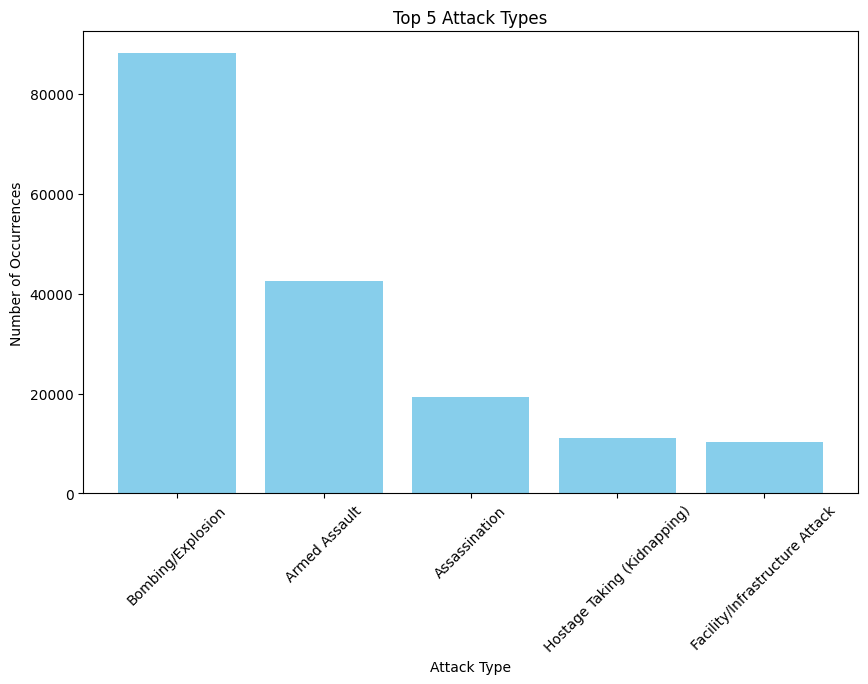

In [ ]:
# Group by attack type and count occurrences
top_attack_types_spark = spark_df.groupBy("attacktype1_txt").count().orderBy(col("count").desc()).limit(5)

# Convert to Pandas DataFrame for plotting
top_attack_types_pd = top_attack_types_spark.toPandas()

# Plotting the top 5 attack types
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_attack_types_pd['attacktype1_txt'], top_attack_types_pd['count'], color='skyblue')
plt.title('Top 5 Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("TestSparkSession").getOrCreate()

if spark is None:
    raise RuntimeError("Failed to initialize Spark session.")
else:
    print("Spark session initialized successfully.")


Spark session initialized successfully.


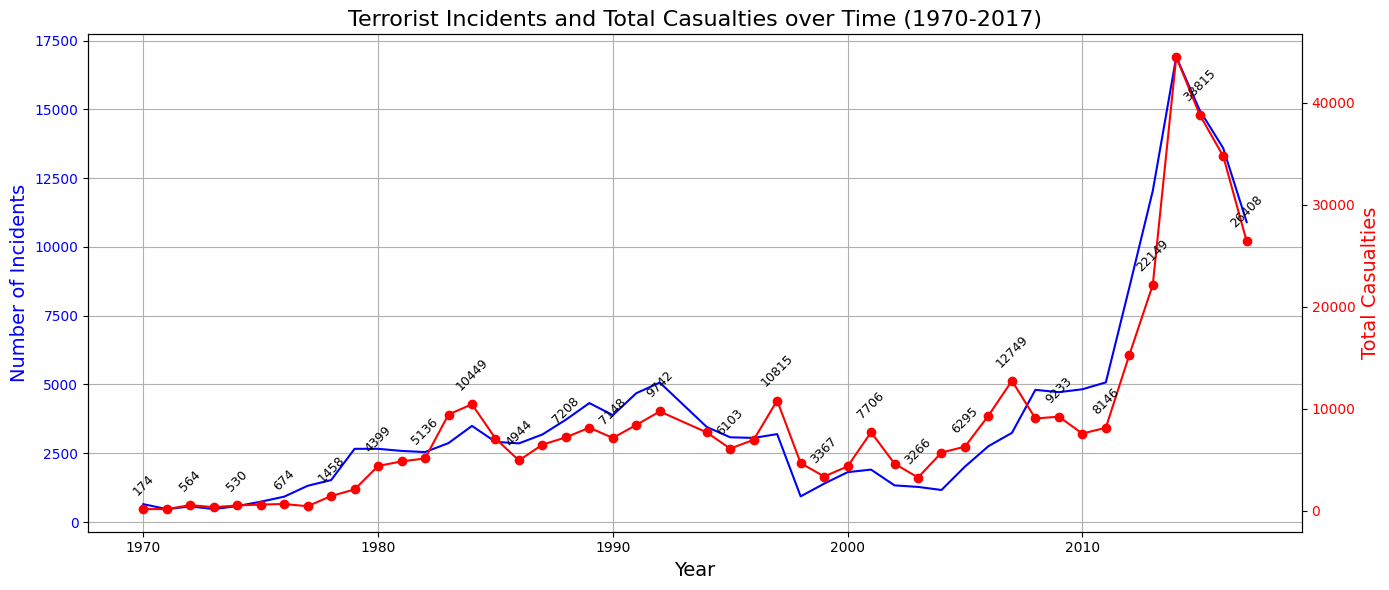

In [ ]:
from pyspark.sql.functions import col, sum as _sum
import matplotlib.pyplot as plt


# 1. Aggregate the data by year to count the number of incidents
frequencies_year = spark_df.groupBy('iyear').agg(count('eventid').alias('number_of_incidents'))
frequencies_year_pd = frequencies_year.toPandas().sort_values(by='iyear')

# 2. Aggregate the data by year to sum the total casualties
significant_events = spark_df.filter(spark_df['nkill'] > 0)  # Filter for events with casualties
yearly_casualties = significant_events.groupBy('iyear').agg(_sum('nkill').alias('total_casualties'))
yearly_casualties_pd = yearly_casualties.toPandas().sort_values(by='iyear')

# 3. Plot both trends on the same figure
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plotting the number of incidents
ax1.plot(frequencies_year_pd['iyear'], frequencies_year_pd['number_of_incidents'], color='blue', label='Number of Incidents')
ax1.set_xlabel('Year', fontsize=14)
ax1.set_ylabel('Number of Incidents', fontsize=14, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a secondary y-axis to plot the total casualties
ax2 = ax1.twinx()
ax2.plot(yearly_casualties_pd['iyear'], yearly_casualties_pd['total_casualties'], color='red', marker='o', label='Total Casualties')
ax2.set_ylabel('Total Casualties', fontsize=14, color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adding a title
plt.title('Terrorist Incidents and Total Casualties over Time (1970-2017)', fontsize=16)

# Annotate significant points to reduce clutter
for i, txt in enumerate(yearly_casualties_pd['total_casualties']):
    if i % 2 == 0:  # Show label only for every other point to reduce clutter
        ax2.annotate(f'{txt:.0f}',
                     (yearly_casualties_pd['iyear'].iloc[i], yearly_casualties_pd['total_casualties'].iloc[i]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center',
                     rotation=45,
                     fontsize=9)  # Rotate label slightly

# Show the plot
fig.tight_layout()  # Adjust layout to accommodate both axes
plt.show()




In [ ]:
frequencies_year = spark_df.groupBy('iyear').agg(count('eventid').alias('number_of_incidents'))

# Ensure the DataFrame has only the necessary columns
frequencies_year = frequencies_year.select('iyear', 'number_of_incidents')

# Convert to Pandas DataFrame for easier plotting with Plotly
frequencies_year_pd = frequencies_year.toPandas()

# Remove any potential duplicates
frequencies_year_pd = frequencies_year_pd.drop_duplicates()

# Ensure 'iyear' is sorted to avoid line crossing
frequencies_year_pd = frequencies_year_pd.sort_values(by='iyear')

# Plotting using Plotly Express
import plotly.express as px

fig = px.line(frequencies_year_pd, x="iyear", y="number_of_incidents")
fig.update_layout(title=dict(text='Terrorist incidents over time 1970-2017', font=dict(size=25)),
                  xaxis_title="Year",
                  yaxis_title="Number of incidents")


fig.show()

In [ ]:
# Assuming spark_df is your PySpark DataFrame

# Filter out rows where 'nkill' is null or 0
filtered_df = spark_df.filter((col('nkill').isNotNull()) & (col('nkill') > 0))

# Select relevant columns for the analysis (e.g., attack type and number of killed)
attack_type_casualties = filtered_df.select('attacktype1_txt', 'nkill')
target_type_casualties = filtered_df.select('targtype1_txt', 'nkill')
region_casualties = filtered_df.select('region_txt', 'nkill')

# Convert to Pandas DataFrame for visualization
attack_type_casualties_pd = attack_type_casualties.toPandas()
target_type_casualties_pd = target_type_casualties.toPandas()
region_casualties_pd = region_casualties.toPandas()


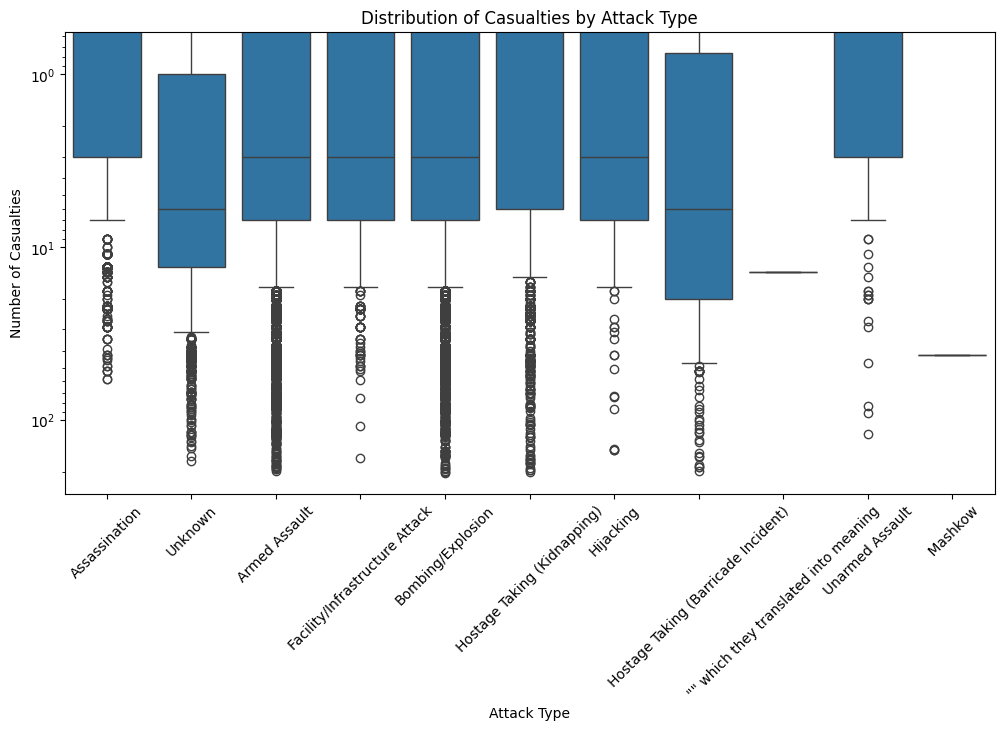

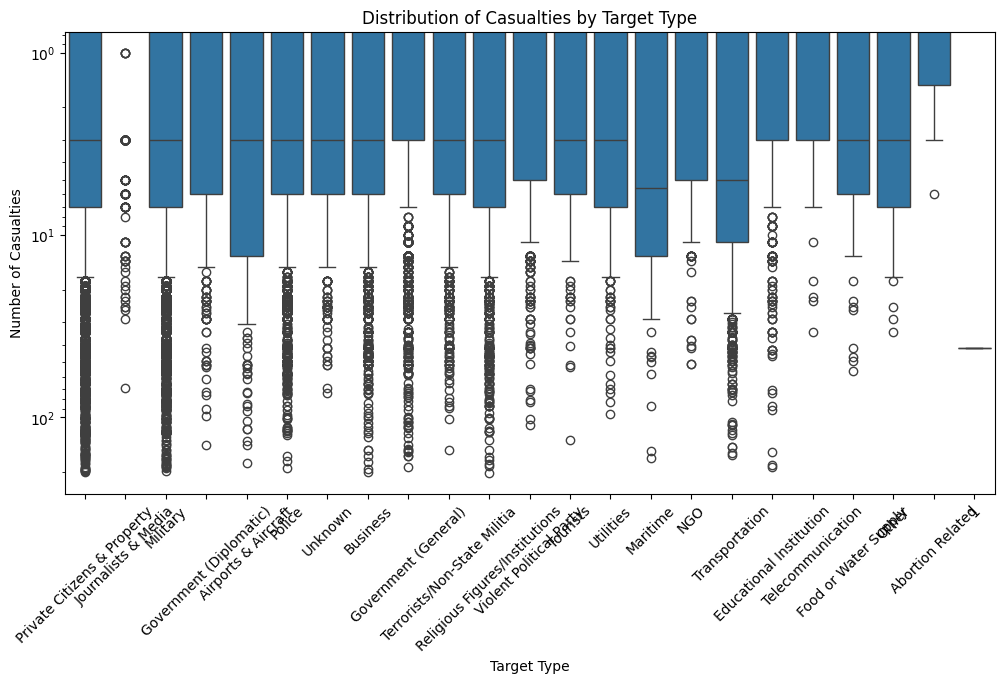

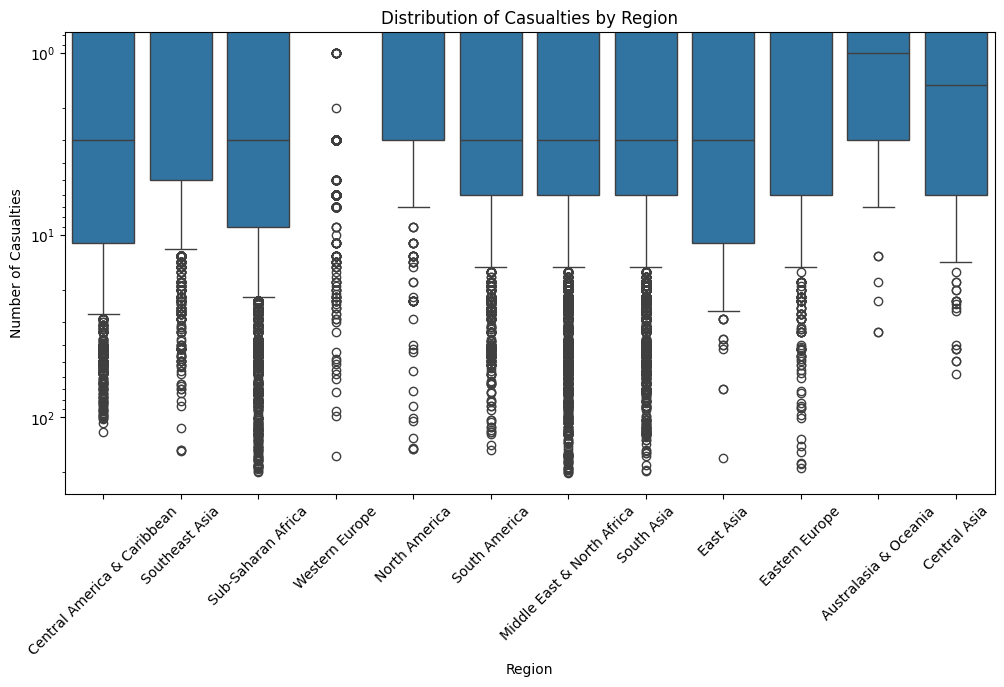

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box Plot for Attack Types
plt.figure(figsize=(12, 6))
sns.boxplot(x='attacktype1_txt', y='nkill', data=attack_type_casualties_pd)
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.title('Distribution of Casualties by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.show()

# Box Plot for Target Types
plt.figure(figsize=(12, 6))
sns.boxplot(x='targtype1_txt', y='nkill', data=target_type_casualties_pd)
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.title('Distribution of Casualties by Target Type')
plt.xlabel('Target Type')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.show()

# Box Plot for Regions
plt.figure(figsize=(12, 6))
sns.boxplot(x='region_txt', y='nkill', data=region_casualties_pd)
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.title('Distribution of Casualties by Region')
plt.xlabel('Region')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.show()


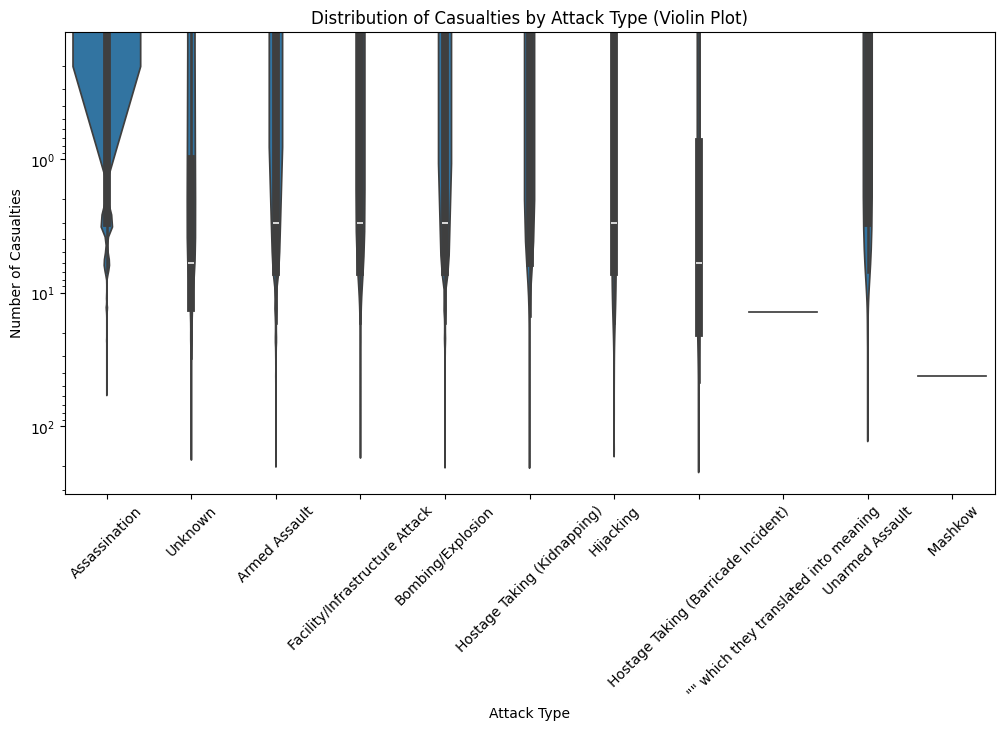

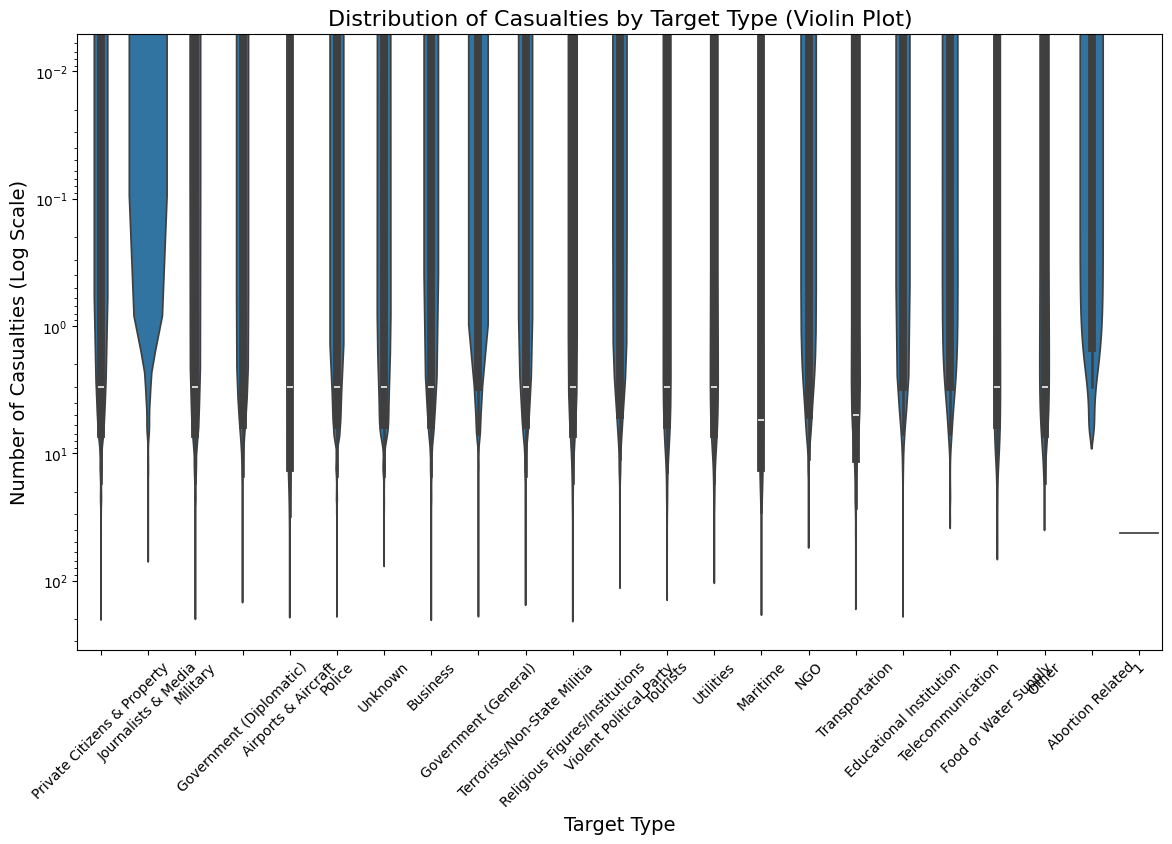

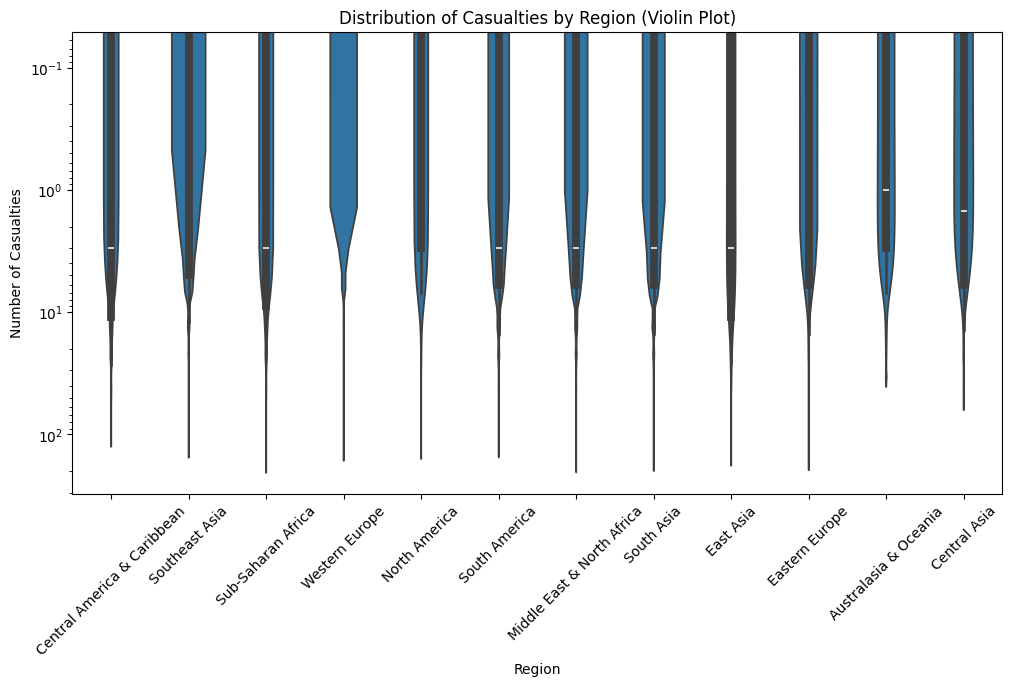

In [ ]:
# Violin Plot for Attack Types
plt.figure(figsize=(12, 6))
sns.violinplot(x='attacktype1_txt', y='nkill', data=attack_type_casualties_pd)
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.title('Distribution of Casualties by Attack Type (Violin Plot)')
plt.xlabel('Attack Type')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.show()

# Violin Plot for Target Types with Logarithmic Scale
plt.figure(figsize=(14, 8))
sns.violinplot(x='targtype1_txt', y='nkill', data=target_type_casualties_pd)
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.title('Distribution of Casualties by Target Type (Violin Plot)', fontsize=16)
plt.xlabel('Target Type', fontsize=14)
plt.ylabel('Number of Casualties (Log Scale)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

# Violin Plot for Regions
plt.figure(figsize=(12, 6))
sns.violinplot(x='region_txt', y='nkill', data=region_casualties_pd)
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.title('Distribution of Casualties by Region (Violin Plot)')
plt.xlabel('Region')
plt.ylabel('Number of Casualties')
plt.xticks(rotation=45)
plt.show()


In [ ]:
pip install plotly dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 64.0 MB/s eta 0:00:00


In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

In [ ]:

# Filter out rows where 'nkill' is null or 0
filtered_df = spark_df.filter((col('nkill').isNotNull()) & (col('nkill') > 0))

# Select relevant columns for the analysis (e.g., attack type, target type, region, and year)
data_df = filtered_df.select('iyear', 'region_txt', 'attacktype1_txt', 'nkill')

# Convert to Pandas DataFrame for use with Dash and Plotly
data_pd = data_df.toPandas()

In [ ]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px

# Create a Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Interactive Terrorist Incidents Dashboard"),

    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(year), 'value': year} for year in sorted(data_pd['iyear'].unique())],
        multi=True,
        placeholder="Select Year(s)"
    ),

    dcc.Dropdown(
        id='region-dropdown',
        options=[{'label': region, 'value': region} for region in sorted(data_pd['region_txt'].unique())],
        multi=True,
        placeholder="Select Region(s)"
    ),

    dcc.Dropdown(
        id='attack-type-dropdown',
        options=[{'label': attack_type, 'value': attack_type} for attack_type in sorted(data_pd['attacktype1_txt'].unique())],
        multi=True,
        placeholder="Select Attack Type(s)"
    ),

    dcc.Graph(id='casualties-graph')
])

# Callback to update the graph based on the selected filters
@app.callback(
    Output('casualties-graph', 'figure'),
    [Input('year-dropdown', 'value'),
     Input('region-dropdown', 'value'),
     Input('attack-type-dropdown', 'value')]
)
def update_graph(selected_years, selected_regions, selected_attack_types):
    filtered_data = data_pd

    if selected_years:
        filtered_data = filtered_data[filtered_data['iyear'].isin(selected_years)]
    if selected_regions:
        filtered_data = filtered_data[filtered_data['region_txt'].isin(selected_regions)]
    if selected_attack_types:
        filtered_data = filtered_data[filtered_data['attacktype1_txt'].isin(selected_attack_types)]

    fig = px.histogram(filtered_data, x='iyear', y='nkill', color='region_txt',
                       title='Number of Casualties by Year',
                       labels={'nkill': 'Number of Casualties'},
                       barmode='group')

    return fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [ ]:
# Assuming spark_df is your PySpark DataFrame

# Select significant events (e.g., events with a high number of casualties)
significant_events = filtered_df.filter(col('nkill') > 50)  # You can adjust the threshold for significance

# Convert to Pandas DataFrame for easier handling with Plotly
significant_events_pd = significant_events.select("iyear", "imonth", "city", "country_txt", "nkill").toPandas()

# Create a new column for the date
significant_events_pd['date'] = pd.to_datetime(significant_events_pd[['iyear', 'imonth']])

# Sort the data by date
significant_events_pd = significant_events_pd.sort_values(by='date')

# Create a timeline plot with annotations
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=significant_events_pd['date'],
    y=significant_events_pd['nkill'],
    mode='markers+lines',
    text=significant_events_pd.apply(lambda row: f"{row['city']}, {row['country_txt']} ({row['nkill']} killed)", axis=1),
    hoverinfo='text',
    marker=dict(size=10, color='red')
))

# Adding annotations for the most significant events
for i, row in significant_events_pd.iterrows():
    fig.add_annotation(
        x=row['date'],
        y=row['nkill'],
        text=f"{row['city']}, {row['country_txt']} ({row['nkill']} killed)",
        showarrow=True,
        arrowhead=1
    )

fig.update_layout(
    title="Timeline of Significant Terrorist Events",
    xaxis_title="Date",
    yaxis_title="Number of Casualties",
    hovermode="closest"
)

fig.show()

ValueError: to assemble mappings requires at least that [year, month, day] be specified: [day,month,year] is missing

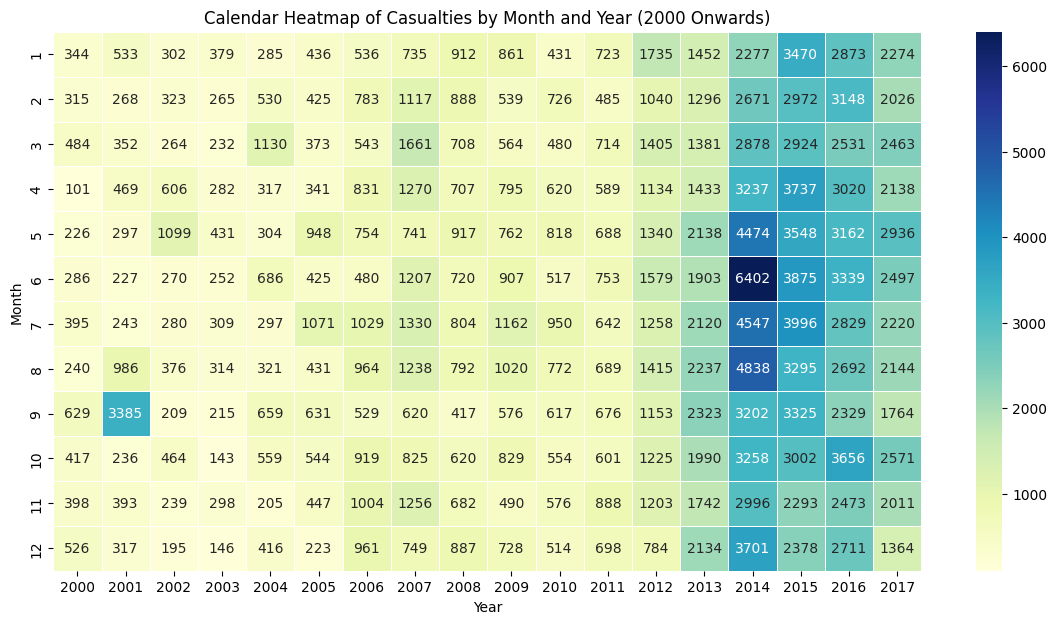

In [ ]:


# Extract year, month, and day from the date (assuming date is in 'imonth' and 'iday')
spark_df = spark_df.withColumn("year", col("iyear"))
spark_df = spark_df.withColumn("month", col("imonth"))

# Filter for incidents from the year 2000 onwards and valid casualties
filtered_df = spark_df.filter((col('nkill').isNotNull()) & (col('nkill') > 0) & (col('year') >= 2000))

# Aggregate by year and month
monthly_incidents = filtered_df.groupBy("year", "month").agg({"nkill": "sum"}).withColumnRenamed("sum(nkill)", "total_casualties")

# Convert to Pandas DataFrame for visualization
monthly_incidents_pd = monthly_incidents.toPandas()

# Create a complete set of year-month combinations for 2000 onwards
years = monthly_incidents_pd['year'].unique()
months = range(1, 13)  # Months from 1 to 12

full_index = pd.MultiIndex.from_product([years, months], names=['year', 'month'])
monthly_incidents_complete = monthly_incidents_pd.set_index(['year', 'month']).reindex(full_index, fill_value=0).reset_index()

# Pivot the data to get a matrix form for the heatmap
heatmap_data = monthly_incidents_complete.pivot(index="month", columns="year", values="total_casualties")

# Plot the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt="g")
plt.title('Calendar Heatmap of Casualties by Month and Year (2000 Onwards)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

In [ ]:
spark_df = spark_df.withColumn("year", col("iyear"))
spark_df = spark_df.withColumn("month", col("imonth"))
spark_df = spark_df.withColumn("day", col("iday"))
# Filter for incidents from the year 2000 onwards and valid casualties
filtered_df = spark_df.filter((col('nkill').isNotNull()) & (col('nkill') > 0) & (col('year') >= 2000))

# Select significant events (e.g., events with a high number of casualties)
significant_events = filtered_df.filter(col('nkill') > 50)  # Adjust the threshold for significance as needed

# Convert to Pandas DataFrame for easier handling with Plotly
significant_events_pd = significant_events.select("year", "month","day", "city", "country_txt", "nkill").toPandas()

# Fill missing 'iday' with 1 if not already present
if 'day' not in significant_events_pd.columns or significant_events_pd['day'].isnull().all():
    significant_events_pd['day'] = 1  # Default day

# Create a new column for the date
print(significant_events_pd[['year', 'month', 'day']])

significant_events_pd['date'] = pd.to_datetime(significant_events_pd[['year', 'month', 'day']])

# Sort the data by date
significant_events_pd = significant_events_pd.sort_values(by='date')

# Create a timeline plot with annotations
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=significant_events_pd['date'],
    y=significant_events_pd['nkill'],
    mode='markers+lines',
    text=significant_events_pd.apply(lambda row: f"{row['city']}, {row['country_txt']} ({row['nkill']} killed)", axis=1),
    hoverinfo='text',
    marker=dict(size=10, color='red')
))

# Adding annotations for the most significant events
for i, row in significant_events_pd.iterrows():
    fig.add_annotation(
        x=row['date'],
        y=row['nkill'],
        text=f"{row['city']}, {row['country_txt']} ({row['nkill']} killed)",
        showarrow=True,
        arrowhead=1
    )

fig.update_layout(
    title="Timeline of Significant Terrorist Events (2000 Onwards)",
    xaxis_title="Date",
    yaxis_title="Number of Casualties",
    hovermode="closest"
)

fig.show()

     year  month  day
0    2000      1    1
1    2000      3    1
2    2000      9    1
3    2000      9    1
4    2001      1    1
..    ...    ...  ...
441  2017     11    1
442  2017     11    1
443  2017     11    1
444  2017     12    1
445  2017     12    1

[446 rows x 3 columns]


/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
spark_df = spark_df.withColumn("year", col("iyear"))
spark_df = spark_df.withColumn("month", col("imonth"))
spark_df = spark_df.withColumn("day", col("iday"))
# Filter for incidents from the year 2000 onwards and valid casualties
filtered_df = spark_df.filter((col('nkill').isNotNull()) & (col('nkill') > 0) & (col('year') >= 2000))

# Select significant events (e.g., events with a high number of casualties)
significant_events = filtered_df.filter(col('nkill') > 50)  # Adjust the threshold for significance as needed

# Convert to Pandas DataFrame for easier handling with Plotly
significant_events_pd = significant_events.select("year", "month", "day", "city", "country_txt", "nkill").toPandas()

# Check and correct any invalid day entries
# Replace any 0 or NaN days with 1 to ensure valid dates
significant_events_pd['day'] = significant_events_pd['day'].apply(lambda x: 1 if pd.isna(x) or x == 0 else x)

# Create a new column for the date
significant_events_pd['date'] = pd.to_datetime(significant_events_pd[['year', 'month', 'day']])

# Sort the data by date
significant_events_pd = significant_events_pd.sort_values(by='date')

# Aggregate data by year and month
aggregated_data = significant_events_pd.groupby(significant_events_pd['date'].dt.to_period('M')).agg({'nkill': 'sum'}).reset_index()
aggregated_data['date'] = aggregated_data['date'].dt.to_timestamp()

# Create a scatter plot with color coding for casualties
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=aggregated_data['date'],
    y=aggregated_data['nkill'],
    mode='markers+lines',
    marker=dict(size=10, color=1, colorscale='Viridis', showscale=True),
    text=aggregated_data.apply(lambda row: f"{row['nkill']} casualties in {row['date'].strftime('%B %Y')}", axis=1),
    hoverinfo='text'
))

# Adding a range slider
fig.update_layout(
    title="Timeline of Significant Terrorist Events (2000 Onwards)",
    xaxis_title="Date",
    yaxis_title="Number of Casualties",
    hovermode="closest",
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    )
)

fig.show()

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
# # Group the data by 'Region' and 'AttackType'
# grouped_data = spark_df.groupby(['Region', 'AttackType']).size().reset_index(name='Count')

# # Create a sunburst chart
# fig = px.sunburst(grouped_data, path=['Region', 'AttackType'], values='Count', color='Count')

# # Set the chart layout
# fig.update_layout(title='Hierarchy of Attack Types by Region')
# fig.show()


# Group the data by 'Region' and 'AttackType' and count the occurrences
grouped_data = spark_df.groupBy('region_txt', 'attacktype1_txt').count()

# Convert the Spark DataFrame to a Pandas DataFrame for visualization
grouped_data_pd = grouped_data.toPandas()

# Check for missing values in the path columns and fill them
# Ensure there are no missing values in 'region_txt' or 'attacktype1_txt'
grouped_data_pd['region_txt'] = grouped_data_pd['region_txt'].fillna('Unknown Region')
grouped_data_pd['attacktype1_txt'] = grouped_data_pd['attacktype1_txt'].fillna('Unknown AttackType')

# Create a sunburst chart using Plotly
fig = px.sunburst(grouped_data_pd, path=['region_txt', 'attacktype1_txt'], values='count', color='count')

# Set the chart layout
fig.update_layout(title='Hierarchy of Attack Types by Region')
fig.show()

<Figure size 1000x600 with 0 Axes>

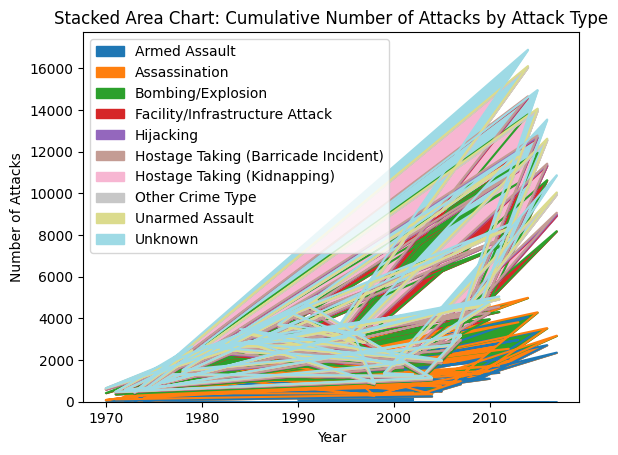

In [ ]:
# # Group the data by 'Year' and 'AttackType' and count the occurrences
# grouped_data = spark_df.groupBy('iyear', 'attacktype1_txt').agg(count('*').alias('count'))

# # Pivot the table to create a structure suitable for a stacked area plot
# pivoted_data = grouped_data.groupBy('iyear').pivot('attacktype1_txt').sum('count')

# # Fill NaN values with 0 to avoid issues during plotting
# pivoted_data = pivoted_data.fillna(0)

# # Convert the Spark DataFrame to a Pandas DataFrame for visualization
# pivoted_data_pd = pivoted_data.toPandas()

# # Set the 'iyear' as the index for plotting
# pivoted_data_pd = pivoted_data_pd.set_index('iyear')

# # Plot the stacked area chart using Matplotlib
# plt.figure(figsize=(10, 6))
# pivoted_data_pd.plot.area(stacked=True, cmap='tab20')

# plt.title('Stacked Area Chart: Cumulative Number of Attacks by Attack Type')
# plt.xlabel('Year')
# plt.ylabel('Number of Attacks')
# plt.legend(loc='upper left')
# plt.show()

# Here we filter out the rows where attacktype1_txt is null or where it's an invalid entry
valid_attack_types = [
    'Armed Assault', 'Assassination', 'Bombing/Explosion',
    'Facility/Infrastructure Attack', 'Hijacking', 'Hostage Taking (Barricade Incident)',
    'Hostage Taking (Kidnapping)', 'Other Crime Type', 'Unarmed Assault', 'Unknown'
]

filtered_df = spark_df.filter(col('attacktype1_txt').isin(valid_attack_types))

# Group the data by 'Year' and 'AttackType' and count the occurrences
grouped_data = filtered_df.groupBy('iyear', 'attacktype1_txt').agg(count('*').alias('count'))

# Pivot the table to create a structure suitable for a stacked area plot
pivoted_data = grouped_data.groupBy('iyear').pivot('attacktype1_txt').sum('count')

# Fill NaN values with 0 to avoid issues during plotting
pivoted_data = pivoted_data.fillna(0)

# Convert the Spark DataFrame to a Pandas DataFrame for visualization
pivoted_data_pd = pivoted_data.toPandas()

# Set the 'iyear' as the index for plotting
pivoted_data_pd = pivoted_data_pd.set_index('iyear')

# Plot the stacked area chart using Matplotlib
plt.figure(figsize=(10, 6))
pivoted_data_pd.plot.area(stacked=True, cmap='tab20')

plt.title('Stacked Area Chart: Cumulative Number of Attacks by Attack Type')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.legend(loc='upper left')
plt.show()